In [31]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

epsilon = np.finfo(float).eps
h_values = np.power(10, -np.arange(17), dtype=float)

In [32]:
def f(x):
    return np.tan(x)


def f_prime(x):
    return 1 + np.tan(x)**2


def f_prime_prime(x):
    return 2*np.tan(x)/(np.cos(x)**2)


def f_prime_prime_prime(x):
    return 2*(1/np.cos(x)**2)**2 + 2*np.tan(x)*(-2*np.tan(x)/np.cos(x)**2)


def forward_diff_method(x, h, f):
    return (f(x + h) - f(x)) / h


def central_diff_method(x, h, f):
    return (f(x+h)-f(x-h))/(2*h)


def forward_h_min():
    return 2*np.sqrt(epsilon/abs(f_prime_prime(1)))


def central_h_min():
    return np.cbrt(3*epsilon/abs(f_prime_prime_prime(1)))

In [33]:
def get_errors(f, M, method):

    values = [method(1, h, f) for h in h_values]
    h_min = min(values)
    computational_errors = abs(values - f_prime(1))
    if (method == forward_diff_method):
        rounding_errors = [2*epsilon/h for h in h_values]
        truncation_errors = [M*h/6 for h in h_values]
    else:
        rounding_errors = [epsilon/h for h in h_values]
        truncation_errors = [(M*h**2)/6 for h in h_values]

    return computational_errors, rounding_errors, truncation_errors, h_min

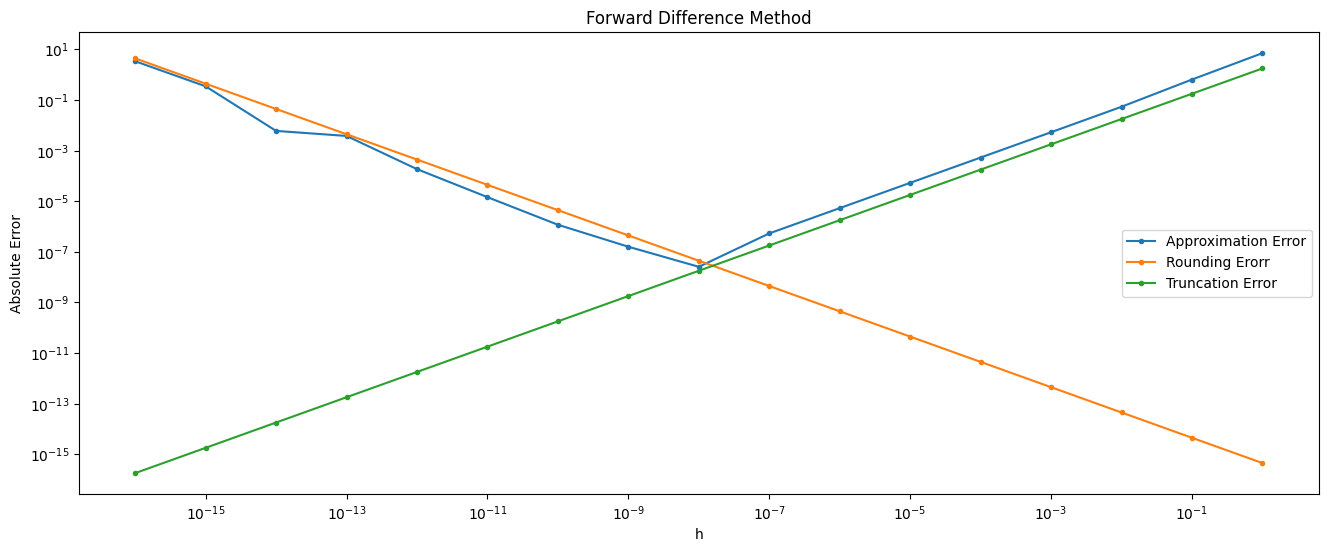

In [34]:

forward_computational_error, forward_rounding_error, forward_trucation_error, forward_experimental_h_min = get_errors(
    f, abs(f_prime_prime(1)), forward_diff_method)

plt.figure(figsize=(16, 6))
plt.loglog(h_values, forward_computational_error,
           label='Approximation Error', marker='.')
plt.loglog(h_values, forward_rounding_error,
           label='Rounding Erorr', marker='.')
plt.loglog(h_values, forward_trucation_error,
           label='Truncation Error', marker='.')
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.title('Forward Difference Method')
plt.legend()
plt.show()

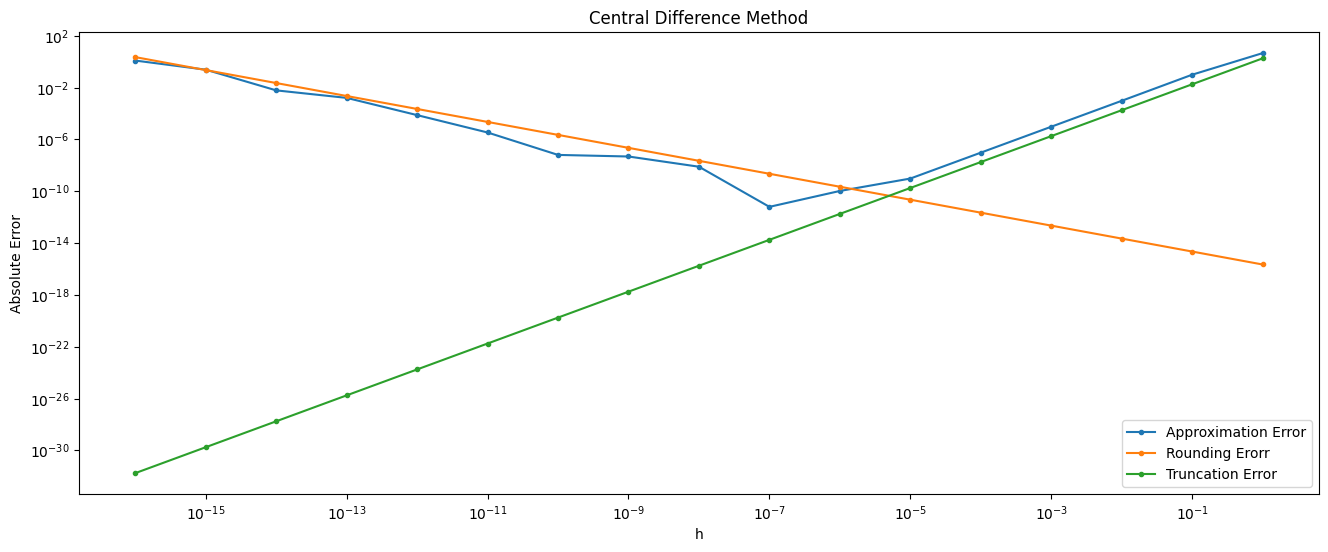

In [35]:
central_computational_error, central_rounding_error, central_trucation_error, central_experimental_h_min = get_errors(
    f, abs(f_prime_prime(1)), central_diff_method)

plt.figure(figsize=(16, 6))
plt.loglog(h_values, central_computational_error,
           label='Approximation Error', marker='.')
plt.loglog(h_values, central_rounding_error,
           label='Rounding Erorr', marker='.')
plt.loglog(h_values, central_trucation_error,
           label='Truncation Error', marker='.')
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.title('Central Difference Method')
plt.legend()
plt.show()

In [45]:
df = pd.DataFrame({
    "eperimental values":[forward_experimental_h_min,central_experimental_h_min],
    "expected values":[forward_h_min(),central_h_min()]
})\
.style.relabel_index(["forward method", "central method"], axis=0)\
.format(precision=30)

df

,eperimental values,expected values
forward method,-3.742447587916421181120085748262,0.000000009123695225180453138686
central method,-1.092519931630759444374234590214,0.000004085802692757501501370603
